<a href="https://colab.research.google.com/github/thedarkscepter/ubiquitous-guacamole/blob/main/C_134_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving main.csv to main.csv


In [2]:
import csv

rows = []

with open("main.csv", "r") as f:
  csvreader = csv.reader(f)
  for row in csvreader: 
    rows.append(row)

headers = rows[0]
planet_data_rows = rows[1:]
print(headers)
print(planet_data_rows[0])

['', 'name', 'light_years_from_earth', 'planet_mass', 'stellar_magnitude', 'discovery_date', 'planet_type', 'planet_radius', 'orbital_radius', 'orbital_period', 'eccentricity', 'solar_system_name', 'planet_discovery_method', 'planet_orbital_inclination', 'planet_density', 'right_ascension', 'declination', 'host_temperature', 'host_mass', 'host_radius']
['0', '11 Comae Berenices b', '305.0', '19.4 Jupiters', '4.74', '2007', 'Gas Giant', '1.08 x Jupiter', '1.29 AU', '326 days', '0.23', '11 Com', 'Radial Velocity', '', '', '12h20m43.03s', '+17d47m34.3s', '4742.0', '2.7', '19.0']


In [3]:
headers[0] = "row_num"

solar_system_planet_count = {}
for planet_data in planet_data_rows:
  if solar_system_planet_count.get(planet_data[11]):
    solar_system_planet_count[planet_data[11]] += 1
  else:
    solar_system_planet_count[planet_data[11]] = 1

max_solar_system = max(solar_system_planet_count, key=solar_system_planet_count.get)
print("Solar system {} has maximum planets {} out of all the solar systems we have discovered so far!".format(max_solar_system, solar_system_planet_count[max_solar_system]))

Solar system KOI-351 has maximum planets 8 out of all the solar systems we have discovered so far!


In [4]:
temp_planet_data_rows = list(planet_data_rows)
for planet_data in temp_planet_data_rows:
  planet_mass = planet_data[3]
  if planet_mass.lower() == "unknown":
    planet_data_rows.remove(planet_data)
    continue
  else:
    planet_mass_value = planet_mass.split(" ")[0]
    planet_mass_ref = planet_mass.split(" ")[1]
    if planet_mass_ref == "Jupiters":
      planet_mass_value = float(planet_mass_value) * 317.8
    planet_data[3] = planet_mass_value

  planet_radius = planet_data[7]
  if planet_radius.lower() == "unknown":
    planet_data_rows.remove(planet_data)
    continue
  else:
    planet_radius_value = planet_radius.split(" ")[0]
    planet_radius_ref = planet_radius.split(" ")[2]
    if planet_radius_ref == "Jupiter":
      planet_radius_value = float(planet_radius_value) * 11.2
    planet_data[7] = planet_radius_value

print(len(planet_data_rows))

hd_10180_planets = []
for planet_data in planet_data_rows:
  if max_solar_system == planet_data[11]:
    hd_10180_planets.append(planet_data)

print(len(hd_10180_planets))
print(hd_10180_planets)

4251
7
[['3665', 'Kepler-903 b', '2704.0', '4.7', '14.615', '2016', 'Super Earth', '2.01', 'Unknown', '10.4 days', '0.0', 'KOI-351', 'Transit', '89.2', '', '18h57m44.04s', '+49d18m18.6s', '6080.0', '1.2', '1.2'], ['3824', 'KOI-142 b', '1106.0', '9.5', '13.11', '2013', 'Neptune-like', 3.4383999999999997, 'Unknown', '10.9 days', '0.06', 'KOI-351', 'Transit', '89.4', '', '18h57m44.04s', '+49d18m18.6s', '6080.0', '1.2', '1.2'], ['3825', 'KOI-142 c', '1106.0', 214.1972, '13.11', '2013', 'Gas Giant', 14.0, '0.15525 AU', '22.3 days', '0.06', 'KOI-351', 'Transit', '89.68', '', '18h57m44.04s', '+49d18m18.6s', '6080.0', '1.2', '1.2'], ['3826', 'KOI-1599.01', '3813.0', '4.6', '14.854000000000001', '2019', 'Super Earth', '1.9', '0.14728 AU', '20.4 days', '0.01', 'KOI-351', 'Transit', '89.71', '', '18h57m44.04s', '+49d18m18.6s', '6080.0', '1.2', '1.2'], ['3827', 'KOI-1599.02', '3813.0', '9', '14.854000000000001', '2019', 'Super Earth', '1.9', '0.112293 AU', '13.6 days', '0.01', 'KOI-351', 'Transit'

In [5]:
import plotly.express as px

hd_10180_planet_masses = []
hd_10180_planet_names = []
for planet_data in hd_10180_planets:
  hd_10180_planet_masses.append(planet_data[3])
  hd_10180_planet_names.append(planet_data[1])

hd_10180_planet_masses.append(1)
hd_10180_planet_names.append("Earth")

fig = px.bar(x=hd_10180_planet_names, y=hd_10180_planet_masses)
fig.show()

In [6]:
temp_planet_data_rows = list(planet_data_rows)
for planet_data in temp_planet_data_rows:
  if planet_data[1].lower() == "hd 100546 b":
    planet_data_rows.remove(planet_data)

planet_masses = []
planet_radiuses = []
planet_names = []
for planet_data in planet_data_rows:
  planet_masses.append(planet_data[3])
  planet_radiuses.append(planet_data[7])
  planet_names.append(planet_data[1])
planet_gravity = []
for index, name in enumerate(planet_names):
  gravity = (float(planet_masses[index])*5.972e+24) / (float(planet_radiuses[index])*float(planet_radiuses[index])*6371000*6371000) * 6.674e-11
  planet_gravity.append(gravity)

fig = px.scatter(x=planet_radiuses, y=planet_masses, size=planet_gravity, hover_data=[planet_names])
fig.show()

In [7]:
low_gravity_planets = []
for index, gravity in enumerate(planet_gravity):
  if gravity < 10:
    low_gravity_planets.append(planet_data_rows[index])

print(len(low_gravity_planets))

1012


In [8]:
low_gravity_planets = []
for index, gravity in enumerate(planet_gravity):
  if gravity < 100:
    low_gravity_planets.append(planet_data_rows[index])

print(len(low_gravity_planets))

3951


In [9]:
print(headers)

['row_num', 'name', 'light_years_from_earth', 'planet_mass', 'stellar_magnitude', 'discovery_date', 'planet_type', 'planet_radius', 'orbital_radius', 'orbital_period', 'eccentricity', 'solar_system_name', 'planet_discovery_method', 'planet_orbital_inclination', 'planet_density', 'right_ascension', 'declination', 'host_temperature', 'host_mass', 'host_radius']


In [10]:
planet_type_values = []
for planet_data in planet_data_rows:
  planet_type_values.append(planet_data[6])

print(list(set(planet_type_values)))

['Neptune-like', 'Gas Giant', 'Super Earth', 'Terrestrial']


In [11]:
planet_masses = []
planet_radiuses = []
for planet_data in low_gravity_planets:
  planet_masses.append(planet_data[3])
  planet_radiuses.append(planet_data[7])

fig = px.scatter(x=planet_radiuses, y=planet_masses)
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



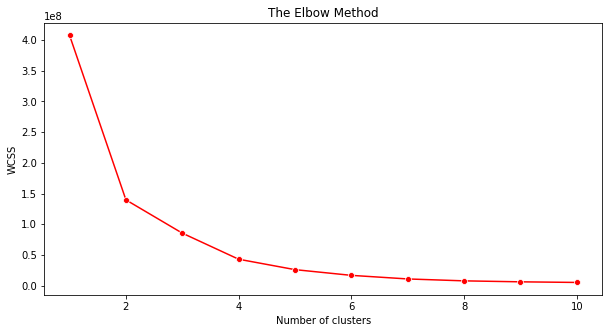

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

X = []
for index, planet_mass in enumerate(planet_masses):
  temp_list = [
                  planet_radiuses[index],
                  planet_mass
              ]
  X.append(temp_list)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
planet_masses = []
planet_radiuses = []
planet_types = []
for planet_data in low_gravity_planets:
  planet_masses.append(planet_data[3])
  planet_radiuses.append(planet_data[7])
  planet_types.append(planet_data[6])

fig = px.scatter(x=planet_radiuses, y=planet_masses, color=planet_types)
fig.show()

In [14]:
suitable_planets = []
for planet_data in low_gravity_planets:
  if planet_data[6].lower() == "terrestrial" or planet_data[6].lower() == "super earth":
    suitable_planets.append(planet_data)

print(len(suitable_planets))

1452


In [15]:
print(headers)

['row_num', 'name', 'light_years_from_earth', 'planet_mass', 'stellar_magnitude', 'discovery_date', 'planet_type', 'planet_radius', 'orbital_radius', 'orbital_period', 'eccentricity', 'solar_system_name', 'planet_discovery_method', 'planet_orbital_inclination', 'planet_density', 'right_ascension', 'declination', 'host_temperature', 'host_mass', 'host_radius']


In [16]:
temp_suitable_planets = list(suitable_planets)
for planet_data in temp_suitable_planets:
  if planet_data[8].lower() == "unknown":
    suitable_planets.remove(planet_data)

for planet_data in suitable_planets:
  if planet_data[9].split(" ")[1].lower() == "days":
    planet_data[9] = float(planet_data[9].split(" ")[0]) #Days
  else:
    planet_data[9] = float(planet_data[9].split(" ")[0])*365 #Years
  planet_data[8] = float(planet_data[8].split(" ")[0])

orbital_radiuses = []
orbital_periods = []
for planet_data in suitable_planets:
  orbital_radiuses.append(planet_data[8])
  orbital_periods.append(planet_data[9])

fig = px.scatter(x=orbital_radiuses, y=orbital_periods)
fig.show()

In [17]:
goldilock_planets = list(suitable_planets) #We will leave suitable planet list as it is

temp_goldilock_planets = list(suitable_planets) 
for planet_data in temp_goldilock_planets:
  if planet_data[8] < 0.38 or planet_data[8] > 2:
    goldilock_planets.remove(planet_data)

print(len(suitable_planets))
print(len(goldilock_planets))

696
25


In [18]:
planet_speeds = []
for planet_data in suitable_planets:
  distance = 2 * 3.14 * (planet_data[8] * 1.496e+9)
  time = planet_data[9] * 86400
  speed = distance / time
  planet_speeds.append(speed)

speed_supporting_planets = list(suitable_planets) #We will leave suitable planet list as it is

temp_speed_supporting_planets = list(suitable_planets)
for index, planet_data in enumerate(temp_speed_supporting_planets):
  if planet_speeds[index] > 200:
    speed_supporting_planets.remove(planet_data)

print(len(speed_supporting_planets))

8


In [19]:
habitable_planets = []
for planet in speed_supporting_planets:
  if planet in goldilock_planets:
    habitable_planets.append(planet)

print(len(habitable_planets))

6


In [20]:
final_dict = {}

for index, planet_data in enumerate(planet_data_rows):
  features_list = []
  gravity = (float(planet_data[3])*5.972e+24) / (float(planet_data[7])*float(planet_data[7])*6371000*6371000) * 6.674e-11
  try:
    if gravity < 100:
      features_list.append("gravity")
  except: pass
  try:
    if planet_data[6].lower() == "terrestrial" or planet_data[6].lower() == "super earth":
      features_list.append("planet_type")
  except: pass
  try:
    if planet_data[8] > 0.38 or planet_data[8] < 2:
      features_list.append("goldilock")
  except: pass
  try:
    distance = 2 * 3.14 * (planet_data[8] * 1.496e+9)
    time = planet_data[9] * 86400
    speed = distance / time
    if speed < 200:
      features_list.append("speed")
  except: pass
  final_dict[index] = features_list

print(final_dict)

{0: [], 1: [], 2: ['gravity'], 3: ['gravity'], 4: ['gravity'], 5: [], 6: ['gravity'], 7: ['gravity'], 8: ['gravity'], 9: ['gravity'], 10: [], 11: [], 12: [], 13: [], 14: ['gravity'], 15: ['gravity'], 16: [], 17: [], 18: [], 19: ['gravity'], 20: ['gravity'], 21: ['gravity'], 22: ['gravity'], 23: [], 24: ['gravity'], 25: ['gravity'], 26: ['gravity'], 27: ['gravity'], 28: ['gravity'], 29: ['gravity', 'planet_type', 'goldilock'], 30: ['gravity'], 31: ['gravity'], 32: ['gravity'], 33: ['gravity'], 34: ['gravity'], 35: [], 36: ['gravity'], 37: ['gravity'], 38: ['gravity'], 39: [], 40: ['gravity'], 41: ['gravity'], 42: [], 43: ['gravity'], 44: [], 45: ['gravity'], 46: [], 47: ['gravity'], 48: ['gravity'], 49: ['gravity'], 50: ['gravity'], 51: ['gravity'], 52: ['gravity'], 53: ['gravity'], 54: [], 55: ['gravity'], 56: ['gravity'], 57: ['gravity'], 58: ['gravity'], 59: [], 60: [], 61: ['gravity'], 62: ['gravity'], 63: ['gravity'], 64: ['gravity'], 65: ['gravity'], 66: [], 67: [], 68: [], 69: []

In [21]:
goldilock_planet_count = 0
for key, value in final_dict.items():
  if "goldilock" in value:
    goldilock_planet_count += 1

print(goldilock_planet_count)

696


In [22]:
speed_planet_count = 0
for key, value in final_dict.items():
  if "speed" in value:
    speed_planet_count += 1

print(speed_planet_count)

8


In [23]:
#C-135

gravity_planet_count = 0
for key, value in final_dict.items():
  if "gravity" in value:
    gravity_planet_count += 1

print(gravity_planet_count)

3951


In [24]:
type_planet_count = 0
for key, value in final_dict.items():
  if "planet_type" in value:
    type_planet_count += 1

print(type_planet_count)

1485


In [25]:
planet_not_gravity_support = []
for planet_data in planet_data_rows:
  if planet_data not in low_gravity_planets:
    planet_not_gravity_support.append(planet_data)
type_no_gravity_planet_count = 0
for planet_data in planet_not_gravity_support:
  if planet_data[6].lower() == 'terrestrial' or planet_data[6].lower() == 'super earth':
    type_no_gravity_planet_count += 1
print(type_no_gravity_planet_count)
print(type_planet_count - type_no_gravity_planet_count)



33
1452


In [26]:
goldilock_planet_count = 0
for key, value in final_dict.items():
  if "goldilock" in value:
    goldilock_planet_count += 1

print(goldilock_planet_count)

696


In [27]:
speed_planet_count = 0
for key, value in final_dict.items():
  if "speed" in value:
    speed_planet_count += 1

print(speed_planet_count)


8


In [32]:
final_dict = {}

for index, planet_data in enumerate(planet_data_rows):
  features_list = []
  gravity = (float(planet_data[3])*5.972e+24) / (float(planet_data[7])*float(planet_data[7])*6371000*6371000) * 6.674e-11
  try:
    if gravity < 100:
      features_list.append("gravity")
  except: pass
  try:
    if planet_data[6].lower() == "terrestrial" or planet_data[6].lower() == "super earth":
      features_list.append("planet_type")
  except: pass
  try:
    if float(planet_data[8].split(' ')[0]) > 0.38 or float(planet_data[8].split(' ')[0]) < 2:
      features_list.append("goldilock")
  except: pass
  try:
    distance = 2 * 3.14 * (float(planet_data[8].split(' ')[0]) * 1.496e+9)
    time, unit = planet_data[9].split(' ')[0], planet_data[9].split(' ')[1]
    if unit.lower() == 'days':
      time = float(time)
    else:
      time = float(time) * 365
    time = time * 86400
    speed = distance / time
    if speed < 200:
      features_list.append("speed")
  except: pass
  final_dict[index] = features_list

print(final_dict)

{0: ['goldilock'], 1: ['goldilock'], 2: ['gravity', 'goldilock'], 3: ['gravity', 'goldilock', 'speed'], 4: ['gravity', 'goldilock'], 5: ['goldilock'], 6: ['gravity', 'goldilock', 'speed'], 7: ['gravity', 'goldilock'], 8: ['gravity', 'goldilock'], 9: ['gravity', 'goldilock'], 10: ['goldilock', 'speed'], 11: ['goldilock', 'speed'], 12: ['goldilock', 'speed'], 13: ['goldilock', 'speed'], 14: ['gravity', 'goldilock', 'speed'], 15: ['gravity', 'goldilock'], 16: [], 17: ['goldilock', 'speed'], 18: ['goldilock'], 19: ['gravity', 'goldilock'], 20: ['gravity', 'goldilock'], 21: ['gravity', 'goldilock', 'speed'], 22: ['gravity', 'goldilock', 'speed'], 23: ['goldilock'], 24: ['gravity', 'goldilock', 'speed'], 25: ['gravity', 'goldilock'], 26: ['gravity', 'goldilock'], 27: ['gravity', 'goldilock'], 28: ['gravity', 'goldilock', 'speed'], 29: ['gravity', 'planet_type'], 30: ['gravity', 'goldilock'], 31: ['gravity', 'goldilock'], 32: ['gravity', 'goldilock'], 33: ['gravity', 'goldilock'], 34: ['gravi

In [33]:
goldilock_planet_count = 0
for key, value in final_dict.items():
  if "goldilock" in value:
    goldilock_planet_count += 1

print(goldilock_planet_count)

2013


In [34]:
speed_planet_count = 0
for key, value in final_dict.items():
  if "speed" in value:
    speed_planet_count += 1

print(speed_planet_count)


307


In [36]:
goldilock_gravity_type_count = 0
for key, value in final_dict.items():
  if "goldilock" in value and "planet_type" in value and "gravity" in value:
    goldilock_gravity_type_count += 1
    
print(goldilock_gravity_type_count) 

0


In [37]:
speed_goldilock_gravity_type_count = 0
for key, value in final_dict.items():
  if "goldilock" in value and "planet_type" in value and "gravity" in value and "speed" in value:
    speed_goldilock_gravity_type_count += 1
    
print(speed_goldilock_gravity_type_count) 

0


In [52]:
final_dict = {}

for index, planet_data in enumerate(planet_data_rows):
  features_list = []
  gravity = (float(planet_data[3])*5.972e+24) / (float(planet_data[7])*float(planet_data[7])*6371000*6371000) * 6.674e-11
  try:
    if gravity < 100:
      features_list.append("gravity")
  except: pass
  try:
    if planet_data[6].lower() == "terrestrial" or planet_data[6].lower() == "super earth":
      features_list.append("planet_type")
  except: pass
  try:
    if float(planet_data[8].split(' ')[0]) > 0.38 or float(planet_data[8].split(' ')[0]) < 2:
      features_list.append("goldilock")
  except: pass
  try:
    if float(planet_data[8].split(' ')[0]) > 0.38 and float(planet_data[8].split(' ')[0]) < 2:
      features_list.append("goldilock")
  except:
    try:
      if planet_data[8] > 0.38 and planet_data[8] < 2:
        features_list.append("goldilock")
    except:pass
  try:
    try:
      distance = 2 * 3.14 * (float(planet_data[8].split(' ')[0]) * 1.496e+9)
    except:
      try:
        distance = 2 * 3.14 * (float(planet_data[8]) * 1.496e+9)
      except: pass 
    try:
        time, unit = planet_data[9].split(' ')[0], planet_data[9].split(' ')[1]
        if unit.lower() == 'days':
          time = float(time)
        else:
          time = float(time) * 365
    except:
      time = planet_data[9]
    time = time * 86400
    speed = distance / time
    if speed < 200:
      features_list.append("speed")
  except: pass
  final_dict[planet_data[1]] = features_list

print(final_dict)

{'11 Comae Berenices b': ['goldilock', 'goldilock'], '11 Ursae Minoris b': ['goldilock', 'goldilock'], '14 Andromedae b': ['gravity', 'goldilock', 'goldilock'], '14 Herculis b': ['gravity', 'goldilock', 'speed'], '16 Cygni B b': ['gravity', 'goldilock', 'goldilock'], '18 Delphini b': ['goldilock'], '1RXS J160929.1-210524 b': ['gravity', 'goldilock', 'speed'], '24 Bootis b': ['gravity', 'goldilock'], '24 Sextantis b': ['gravity', 'goldilock', 'goldilock'], '24 Sextantis c': ['gravity', 'goldilock'], '2MASS J01033563-5515561 AB b': ['goldilock', 'speed'], '2MASS J01225093-2439505 b': ['goldilock', 'speed'], '2MASS J02192210-3925225 b': ['goldilock', 'speed'], '2MASS J04414489+2301513 b': ['goldilock', 'speed'], '2MASS J12073346-3932539 b': ['gravity', 'goldilock', 'speed'], '2MASS J19383260+4603591 b': ['gravity', 'goldilock', 'goldilock'], '2MASS J21402931+1625183 A b': ['speed'], '2MASS J22362452+4751425 b': ['goldilock', 'speed'], '30 Arietis B b': ['goldilock', 'goldilock'], '42 Drac

In [53]:
goldilock_planet_count = 0
for key, value in final_dict.items():
  if "goldilock" in value:
    goldilock_planet_count += 1

print(goldilock_planet_count)


2031


In [54]:
goldilock_gravity_type_count = 0
for key, value in final_dict.items():
  if "goldilock" in value and "planet_type" in value and "gravity" in value:
    goldilock_gravity_type_count += 1
    
print(goldilock_gravity_type_count) 

24


In [55]:
speed_planet_count = 0
for key, value in final_dict.items():
  if "speed" in value:
    speed_planet_count += 1

print(speed_planet_count)


507


In [56]:
speed_goldilock_gravity_type_count = 0
for key, value in final_dict.items():
  if "goldilock" in value and "planet_type" in value and "gravity" in value and "speed" in value:
    speed_goldilock_gravity_type_count += 1
    
print(speed_goldilock_gravity_type_count) 

6
